# Yelp Data (Initial Exploration)

Import the python scientific suite

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
import seaborn as sns
import scipy

# This is importing a "future" python version 3 print function.
from __future__ import print_function
from __future__ import division
%matplotlib inline
sns.set()
sns.set_context('paper', font_scale = 1.5)
sns.set_style('ticks')

/Users/Franklin/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
file_dir = '/Volumes/1TB_BAY/yelp_dataset_challenge_academic_dataset/'

In [8]:
b = pd.read_csv('yelp_business_with_neighborhood.csv')
st = pd.read_csv('static_stats.csv')

bst = pd.merge(b,st, on = 'z_hood', how = 'left')

/Users/Franklin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,5,30,50,61,63,80,87,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


TypeError: lmplot() takes at least 3 arguments (4 given)

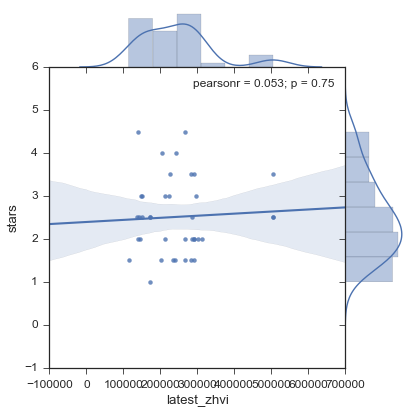

In [111]:
idx = 19
sns.jointplot(bst[bst['name'] == top_chains['name'][idx]]['latest_zhvi'],bst[bst['name'] == top_chains['name'][idx]]['stars'],\
  kind = 'reg', space = 0)

sns.lmplot(bst[bst['name'] == top_chains['name'][idx]]['latest_zhvi'],bst[bst['name'] == top_chains['name'][idx]]['stars'],\
  fit_reg = False, hue = 'state')
plt.xlim(0,600000)
plt.ylim(1, 5)
print(top_chains['name'][idx])

In [33]:
name, counts = np.unique(b['name'], return_counts = True)
counts_df = pd.DataFrame(data = {'name': name, 'counts':counts})
top_chains = counts_df.sort_values(by = 'counts', ascending = False)
top_chains.index = range(len(top_chains)) #re-index
counts_df.sort_values(by = 'counts', ascending = False).head(100).to_csv('top100_chains.csv')
print(counts_df.sort_values(by = 'counts', ascending = False).head(20).to_latex())

\begin{tabular}{lrl}
\toprule
{} &  counts &                    name \\
\midrule
24075 &     230 &               Starbucks \\
24372 &     193 &                  Subway \\
16363 &     172 &              McDonald's \\
28521 &     102 &               Walgreens \\
24979 &      95 &               Taco Bell \\
19960 &      79 &               Pizza Hut \\
26606 &      77 &           The UPS Store \\
28664 &      76 &                 Wendy's \\
4545  &      74 &             Burger King \\
2929  &      73 &         Bank of America \\
28660 &      70 &        Wells Fargo Bank \\
6123  &      67 &                Circle K \\
11221 &      64 &             Great Clips \\
8224  &      60 &          Domino's Pizza \\
8496  &      59 &          Dunkin' Donuts \\
18839 &      59 &           Panda Express \\
5670  &      55 &              Chase Bank \\
5950  &      52 &  Chipotle Mexican Grill \\
24680 &      52 &               Supercuts \\
27615 &      51 &          US Post Office \\
\bottomrule
\end{ta

In [5]:
import ast
categories = [ast.literal_eval(i) for i in b['categories']] #convert the categories string to a list of lists
flat_categories = [item for sublist in categories for item in sublist] #flatten this list so the most common categories can be explored
categ_df = pd.DataFrame(data = {'category': np.unique(flat_categories, return_counts = True)[0],\
                                'counts': np.unique(flat_categories, return_counts = True)[1]})
categ_df.sort_values(by = 'counts', ascending = False).head(100).to_csv('top100_categories.csv')
print(categ_df.sort_values(by = 'counts', ascending = False).head(20).to_latex())

\begin{tabular}{llr}
\toprule
{} &                   category &  counts \\
\midrule
648 &                Restaurants &   11128 \\
677 &                   Shopping &    5746 \\
294 &                       Food &    4262 \\
73  &              Beauty \& Spas &    3575 \\
351 &           Health \& Medical &    3085 \\
372 &              Home Services &    2755 \\
54  &                 Automotive &    2327 \\
511 &                  Nightlife &    2178 \\
451 &             Local Services &    2053 \\
65  &                       Bars &    1910 \\
3   &                Active Life &    1579 \\
273 &                    Fashion &    1434 \\
263 &  Event Planning \& Services &    1399 \\
480 &                    Mexican &    1366 \\
274 &                  Fast Food &    1355 \\
657 &                 Sandwiches &    1233 \\
582 &                      Pizza &    1232 \\
18  &     American (Traditional) &    1211 \\
343 &                Hair Salons &    1153 \\
229 &                    Doctors &    1

In [8]:
import csv
from textstat.textstat import textstat
import pattern.en as en

In [28]:
def ReadJson(myfile){}
    # read the entire file into a python array
    with open(myfile, 'rb') as f:
        data = f.readlines()

    # remove the trailing "\n" from each line
    data = map(lambda x: x.rstrip(), data)

    # each element of 'data' is an individual JSON object.
    # i want to convert it into an *array* of JSON objects
    # which, in and of itself, is one large JSON object
    # basically... add square brackets to the beginning
    # and end, and have all the individual business JSON objects
    # separated by a comma
    data_json_str = "[" + ','.join(data) + "]"

    # now, load it into pandas
    data_df = pd.read_json(data_json_str)
    
    return data_df

SyntaxError: invalid syntax (<ipython-input-28-2e9d324a193c>, line 1)

In [28]:
print(textstat.flesch_reading_ease(r['text'][0]))
print(textstat.flesch_kincaid_grade(r['text'][0]))

72.16
7.2


In [49]:
def ReviewMetrics(r):
    fk_re = []
    fk_gr = []
    
    for rev in r['text']:
        fk_re.append(textstat.flesch_reading_ease(rev)) #reading ease
        fk_gr.append(textstat.flesch_kincaid_grade(rev)) #grade reading level
    
    return pd.DataFrame(data = [fk_re, fk_gr]).T

In [50]:
ReviewMetrics(r)

,0,1
0,72.16,7.2
1,68.77,6.4
2,84.68,4.4
3,90.77,2.1
4,79.60,6.4
5,84.68,4.4
6,96.18,2.1
7,70.80,5.6
8,87.05,5.6
9,74.19,6.4


In [6]:
# import modules
import json
import glob

# read in yelp data
yelp_files = file_dir + "yelp_academic_dataset_review.json"
yelp_data = []
with open(yelp_files) as f:
    for line in f:
        yelp_data.append(json.loads(line))
        
r = pd.DataFrame(yelp_data) #successful readin of part of the DF.

In [9]:
#r.to_csv(file_dir + 'review_without_text.csv', columns = ['review_id','user_id','business_id','date','stars','type','votes'])

In [10]:
#r = pd.read_csv(file_dir + 'review_without_text.csv')

In [5]:
from astropy.time import Time
t_column = []
for t in r['date']: #for each time
    t_column.append(Time(t).decimalyear) #convert the time to jd and add it to a new column

NameError: name 'r' is not defined

In [ ]:
#r['year'] = t_column
#r.to_csv(file_dir + 'review_without_text_year.csv', columns = ['review_id','user_id','business_id','year','date','stars'])

In [5]:
#r = pd.read_csv(file_dir + 'review_without_text_year.csv')
r = pd.read_csv(file_dir + 'reviews_neighborhood.csv')

/Users/Franklin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (11,14,15,16,17,23,26,35,36,38,39,43,46,55,58,61,69,71,80,86,88,92,95,100,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
len(st)

413

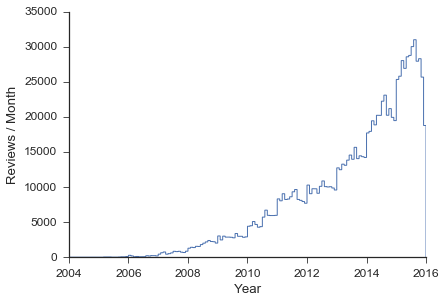

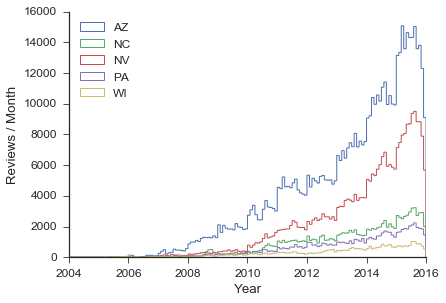

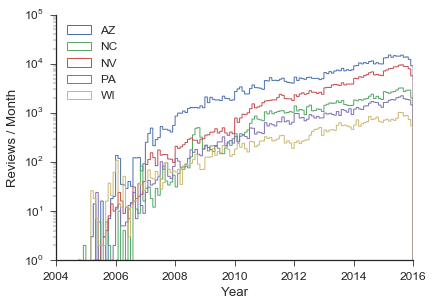

In [74]:
plt.hist(r['year'], range = [2004,2016], bins = 144, histtype = 'step', lw = 1)
sns.despine()
plt.xlim(2004,2016)
plt.ylabel('Reviews / Month')
plt.xlabel('Year')
plt.savefig('./paper/' + 'total_review_trend.png', fmt = 'png', dpi = 300)

plt.figure()
for state in np.unique(r['state']):
    plt.hist(r['year'][(r['state'] == state)], range = [2004,2016], bins = 144, histtype = 'step', lw = 1, label = state)
sns.despine()
plt.xlim(2004,2016)
plt.ylabel('Reviews / Month')
plt.xlabel('Year')
plt.legend(loc = 2)
plt.savefig('./paper/' + 'state_review_trend.png', fmt = 'png', dpi = 300)

plt.figure()
for state in np.unique(r['state']):
    plt.hist(r['year'][(r['state'] == state)], range = [2004,2016], bins = 144, histtype = 'step', lw = 1, label = state)
sns.despine()
plt.xlim(2004,2016)
plt.ylabel('Reviews / Month')
plt.xlabel('Year')
plt.ylim(1,100000)
plt.yscale('log')
plt.legend(loc = 2)
plt.savefig('./paper/' + 'state_review_trend_log.png', fmt = 'png', dpi = 300)

In [60]:
business, bcounts = np.unique(r['business_id'], return_counts = True)

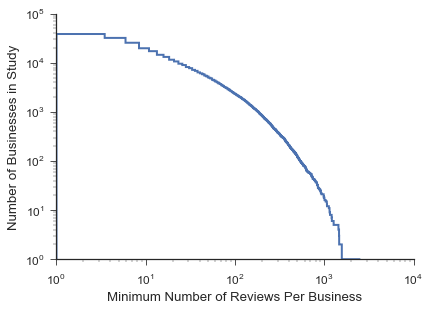

In [61]:
plt.hist(bcounts, bins = 1000, cumulative = -1,\
         histtype = 'step', lw = 2)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Number of Businesses in Study')
plt.xlabel('Minimum Number of Reviews Per Business')
sns.despine()
plt.savefig('./paper/review_business_hist.png', fmt = 'png', dpi = 300)

In [21]:
def ResExam(x, y, bins = 10):
    
    '''
    Dependencies:
        import scipy
        import pandas as pd
        import numpy as np
        import matplotlib.pyplot as plt
    
    '''
    
    bm, be, _ = scipy.stats.binned_statistic(x, y, statistic = 'mean', bins = bins)
    bs, _, _ = scipy.stats.binned_statistic(x, y, statistic = 'std', bins = bins)
    berr, _ ,_ = scipy.stats.binned_statistic(x, y, statistic = scipy.stats.sem, bins = bins)

    bin_width = (be[1] - be[0]) #compute the bin width, to calculate the bin centers
    bc = be[1:] - bin_width/2 #compute the bin centers

    fig = plt.figure()
    #plt.scatter(x,y, lw = 0, s = 0.5, alpha = 1, c = 'black') #lightly scatter the original data
    plt.errorbar(bc, bm, berr, fmt = '.',color = 'red', lw = 1) #now draw the binned statistic
    plt.axhline(0, c = 'grey', lw = 0.5) #plot the 0 residual line

    plt.gca().yaxis.set_label_coords(-0.12, 0.5)
    sns.despine()
    
    return bc, bm, berr, np.std(y), fig

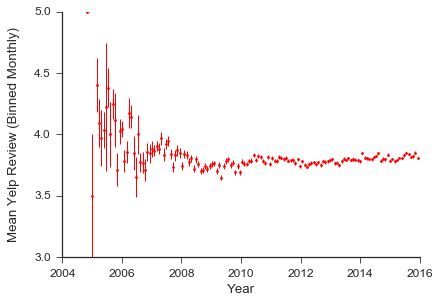

In [62]:
ResExam(r['year'], r['stars_x'], bins = 144)
plt.ylim(3,5)
plt.xlabel('Year')
plt.ylabel('Mean Yelp Review (Binned Monthly)')
plt.savefig('./paper/all_review_trend.png',fmt = 'png', dpi = 300)

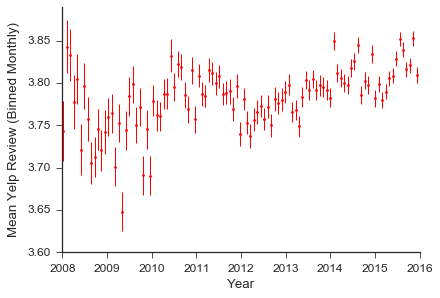

In [64]:
ResExam(r['year'], r['stars_x'], bins = 144)
plt.ylim(3.6,3.89)
plt.xlim(2008,2016)
plt.xlabel('Year')
plt.ylabel('Mean Yelp Review (Binned Monthly)')
plt.gca().ticklabel_format(useOffset=False)
plt.savefig('./paper/all_review_trend_detail.png',fmt = 'png',dpi = 300)

In [68]:
rst = pd.merge(r,st, on = 'z_hood', how = 'left')

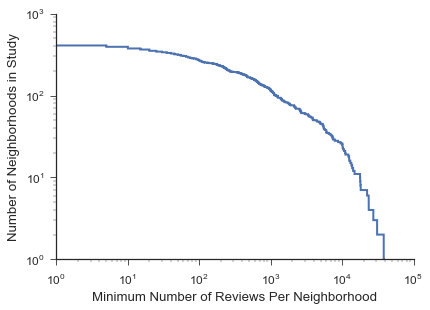

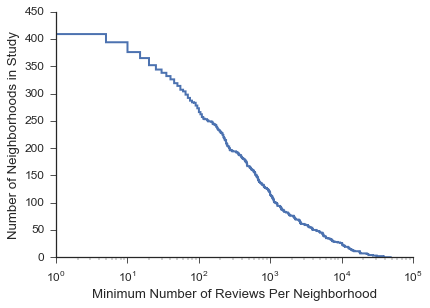

In [72]:
plt.figure()
plt.hist(np.unique(r['z_hood'], return_counts = True)[1],\
         bins = 10000, range = [0,50000], cumulative = -1, histtype = 'step',
        lw = 2)
sns.despine()
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Number of Neighborhoods in Study')
plt.xlabel('Minimum Number of Reviews Per Neighborhood')

plt.figure()
plt.hist(np.unique(r['z_hood'], return_counts = True)[1],\
         bins = 10000, range = [0,50000], cumulative = -1, histtype = 'step',
        lw = 2)
sns.despine()
plt.xscale('log')
plt.ylabel('Number of Neighborhoods in Study')
plt.xlabel('Minimum Number of Reviews Per Neighborhood')
plt.savefig('./paper/review_neighborhood_hist.png', fmt = 'png', dpi = 300)

In [ ]:
plt.hist(np.unique(r['z_hood'], return_counts = True)[1],\
         bins = 100, range = [0,50000], cumulative = -1, histtype = 'step',
        lw = 2)
sns.despine()
plt.yscale('log')
plt.xscale('log')

In [67]:
plt.scatter(np.unique(r['z_hood'], return_counts = True)[1], rst['n'])

NameError: name 'rst' is not defined

In [76]:
list(rst.columns)

['Unnamed: 0_x',
 'Unnamed: 0.1',
 'Unnamed: 0_x',
 'review_id',
 'user_id',
 'business_id',
 'year',
 'date',
 'stars_x',
 'Unnamed: 0_y',
 'attributes.Ambience.divey',
 'attributes.Dietary Restrictions.vegan',
 'attributes.Happy Hour',
 'hours.Thursday.open',
 'attributes.Order at Counter',
 'attributes.Hair Types Specialized In.africanamerican',
 'attributes.Hair Types Specialized In.kids',
 'attributes.BYOB',
 'hours.Friday.open',
 'attributes.Good For.latenight',
 'attributes.Outdoor Seating',
 'attributes.Alcohol',
 'attributes.Ambience.classy',
 'attributes.By Appointment Only',
 'attributes.Parking.lot',
 'attributes.Ambience.touristy',
 'attributes.Corkage',
 'hours.Tuesday.open',
 'attributes.Good For.brunch',
 'categories',
 'attributes.Waiter Service',
 'hours.Monday.open',
 'name',
 'attributes.Parking.street',
 'attributes.Ambience.hipster',
 'attributes.BYOB/Corkage',
 'attributes.Hair Types Specialized In.straightperms',
 'attributes.Music.live',
 'attributes.Dietary Re

In [82]:
rst.drop(['Unnamed: 0_x', 'Unnamed: 0.1',\
          'Unnamed: 0_x','Unnamed: 0_y','loop_i','full_address'], axis = 1, inplace = True)

In [88]:
len(np.unique(rst['user_id'], return_counts = True)[0])

314843

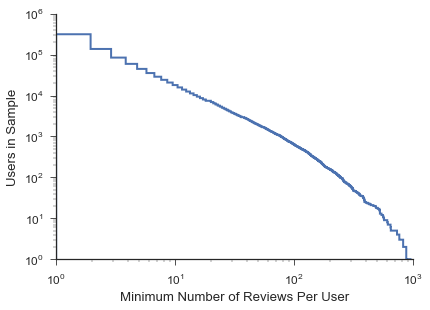

In [93]:
plt.hist(np.unique(rst['user_id'], return_counts = True)[1], bins = 1000, cumulative = -1,\
         histtype = 'step', lw = 2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Minimum Number of Reviews Per User')
plt.ylabel('Users in Sample')
sns.despine()

In [114]:
k = 3001
urst = rst[(rst['user_id'] == rst['user_id'][k])]
kmeans = sklearn.cluster.KMeans(n_clusters = 1)
kmeans.fit(urst[['longitude','latitude']].as_matrix())
plt.scatter(urst['longitude'], urst['latitude'])
plt.scatter(kmeans.cluster_centers_[0][0],kmeans.cluster_centers_[0][1],s = 20, c = 'r')

NameError: name 'rst' is not defined

In [143]:
import random
from sklearn.metrics.pairwise import pairwise_distances

def kMedoids(D, k, tmax=100):
    # determine dimensions of distance matrix D
    m, n = D.shape

    # randomly initialize an array of k medoid indices
    M = np.sort(np.random.choice(n, k))

    # create a copy of the array of medoid indices
    Mnew = np.copy(M)

    # initialize a dictionary to represent clusters
    C = {}
    for t in xrange(tmax):
        # determine clusters, i. e. arrays of data indices
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]
        # update cluster medoids
        for kappa in range(k):
            J = np.mean(D[np.ix_(C[kappa],C[kappa])],axis=1)
            j = np.argmin(J)
            Mnew[kappa] = C[kappa][j]
        np.sort(Mnew)
        # check for convergence
        if np.array_equal(M, Mnew):
            break
        M = np.copy(Mnew)
    else:
        # final update of cluster memberships
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]

    # return results
    return M, C

# 3 points in dataset
data = np.array([[1,1], 
                [2,2], 
                [10,10]])

# distance matrix
D = pairwise_distances(data, metric='euclidean')

# split into 2 clusters
M, C = kmedoids.kMedoids(D, 2)

print('medoids:')
for point_idx in M:
    print( data[point_idx] )

print('')
print('clustering result:')
for label in C:
    for point_idx in C[label]:
        print('label {0}:　{1}'.format(label, data[point_idx]))